# Identificacao de Imagens de Satelite

In [4]:
# Carregar pacotes

# Quais pacotes serao utilizados? pandas, numpy, opencv, pillow, scikit-learn?

############################
###### INSERT CODE HERE ####
############################

In [6]:
from pycocotools.coco import COCO
from pycocotools import mask as cocomask
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import random
import os

%matplotlib inline


In [35]:
print("""|-- Dataset/
|   |-- test_images/ (has all images for prediction)
|   |-- train/
|   |   |-- images (has all the images for training)
|   |   |__ annotation.json : Annotation of the data in MS COCO format
|   |   |__ annotation-small.json : Smaller version of the "annotation.json"
|   |-- val/
|   |   |-- images (has all the images for training)
|   |   |__ annotation.json : Annotation of the data in MS COCO format
|   |   |__ annotation-small.json : Smaller version of the "annotation.json" """)


|-- Dataset/
|   |-- test_images/ (has all images for prediction)
|   |-- train/
|   |   |-- images (has all the images for training)
|   |   |__ annotation.json : Annotation of the data in MS COCO format
|   |   |__ annotation-small.json : Smaller version of the "annotation.json"
|   |-- val/
|   |   |-- images (has all the images for training)
|   |   |__ annotation.json : Annotation of the data in MS COCO format
|   |   |__ annotation-small.json : Smaller version of the "annotation.json" 


In [5]:
# Path onde as imagens estao localizadas?


In [12]:
PATH_TRAIN_IMAGES = '../Dataset/train/images'
PATH_TRAIN_LABELS = '../Dataset/train/annotation.json'

In [23]:
# Inicia a classe coco para trabalhar com as imagens
coco = COCO(PATH_TRAIN_LABELS)

# Obtem os nomes das imagens e salva em uma lista
img_ids = coco.getImgIds()

loading annotations into memory...
Done (t=27.06s)
creating index...
index created!


## Explorando uma imagem

In [30]:
# Seleciona uma imagem
img_id = random.choice(img_ids)
print(f'Imagem selecionada: {img_id}')

# Obtem as anotacoes para a determinada imagem
img = coco.loadImgs(img_id)[0]
print(f'Informacoes da imagem selecionada: {img}')

# Carrega as anotacoes da imagem selecionada
ann = coco.loadAnns(coco.getAnnIds(imgIds=img['id']))
print(f'Anotacoes da imagem selecionada: {ann[0]}')



Imagem selecionada: 55510
Informacoes da imagem selecionada: {'id': 55510, 'file_name': '000000055510.jpg', 'width': 300, 'height': 300}
Anotacoes da imagem selecionada: {'id': 472864, 'image_id': 55510, 'segmentation': [[275.0, 237.0, 275.0, 300.0, 221.0, 300.0, 221.0, 237.0, 275.0, 237.0]], 'area': 3402.0, 'bbox': [221.0, 221.0, 79.0, 54.0], 'category_id': 100, 'iscrowd': 0}


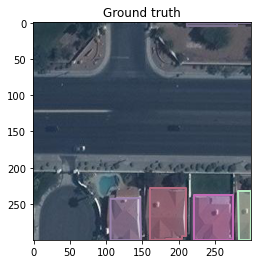

In [31]:
# Obtem o caminho da imagem
image_path = os.path.join(PATH_TRAIN_IMAGES, img["file_name"])

# Faz a leitura da imagem
I = io.imread(image_path)

# Mostra a imagem
plt.imshow(I);
coco.showAnns(ann)
plt.title('Ground truth');

In [ ]:
#

## Explorando mais imagens